In [38]:
import requests
import os
import json
import re
import emoji
import pandas as pd
import numpy as np
from glob import glob
import transformers
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import csv
import datetime
import dateutil.parser
import unicodedata
import time
import torch
import matplotlib.pyplot as plt

In [2]:
btc_two_mnth1 = sorted(glob('btc20_3*.json'))
btc_two_mnth1

['btc20_310.json',
 'btc20_3100.json',
 'btc20_3105.json',
 'btc20_3110.json',
 'btc20_3115.json',
 'btc20_3120.json',
 'btc20_3125.json',
 'btc20_3130.json',
 'btc20_3135.json',
 'btc20_3140.json',
 'btc20_3145.json',
 'btc20_315.json',
 'btc20_3150.json',
 'btc20_3155.json',
 'btc20_3160.json',
 'btc20_3165.json',
 'btc20_3170.json',
 'btc20_3175.json',
 'btc20_3180.json',
 'btc20_3185.json',
 'btc20_3190.json',
 'btc20_3195.json',
 'btc20_320.json',
 'btc20_3200.json',
 'btc20_3205.json',
 'btc20_3210.json',
 'btc20_3215.json',
 'btc20_3220.json',
 'btc20_3225.json',
 'btc20_3230.json',
 'btc20_3235.json',
 'btc20_3240.json',
 'btc20_3245.json',
 'btc20_325.json',
 'btc20_3250.json',
 'btc20_3255.json',
 'btc20_3260.json',
 'btc20_3265.json',
 'btc20_3270.json',
 'btc20_3275.json',
 'btc20_3280.json',
 'btc20_3285.json',
 'btc20_3290.json',
 'btc20_3295.json',
 'btc20_330.json',
 'btc20_3300.json',
 'btc20_3305.json',
 'btc20_3310.json',
 'btc20_3315.json',
 'btc20_3320.json',
 'btc

In [3]:
data = []

for f in btc_two_mnth1:

    with open(f,) as infile:

        data.extend(json.load(infile))

with open("merged.json",'w') as outfile:

  json.dump(data, outfile)

In [4]:
len(data)

596

In [5]:
list(data[0])

['data', 'includes', 'errors', 'meta']

In [6]:
len((data[0]['data']))

404

In [7]:
(data[0]['data'][403])

{'edit_history_tweet_ids': ['1245039716153556994'],
 'lang': 'en',
 'author_id': '734670244782985216',
 'conversation_id': '1245039716153556994',
 'id': '1245039716153556994',
 'text': 'RT @CreamPress: In this tough times @creamcoin team is building, if you have BTC transaction issues, boost it with our BTC accelerator.\n@Bi…',
 'created_at': '2020-03-31T17:26:14.000Z',
 'reply_settings': 'everyone',
 'referenced_tweets': [{'type': 'retweeted', 'id': '1245018919280300039'}],
 'public_metrics': {'retweet_count': 106,
  'reply_count': 0,
  'like_count': 0,
  'quote_count': 0,
  'impression_count': 0}}

In [8]:
veri=[]
tarih=[]
dil=[]
kaynak=[]
for i in range(0,len(data)-1):
    for j in range(0,len(data[i]['data'])):
        veri.append(data[i]['data'][j]['text'])
        tarih.append(data[i]['data'][j]['created_at'])
        dil.append(data[i]['data'][j]['lang'])


In [9]:
len(dil)

245976

In [10]:
import pandas as pd
df=pd.DataFrame([tarih,veri,dil]).T
df
df.columns=['Tarih','Metin','Dil']
df


,Tarih,Metin,Dil
0,2020-03-31T18:24:37.000Z,RT @SaturnProtocol: Do you need to be holding ...,en
1,2020-03-31T18:24:16.000Z,Funny @CoinMarketCap you had us excited for a ...,en
2,2020-03-31T18:24:12.000Z,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...,en
3,2020-03-31T18:24:11.000Z,RT @truechaingroup: #TrueChain (TRUE) #Airdrop...,en
4,2020-03-31T18:24:09.000Z,"RT @Bitit_Gift: ""The future of money is digita...",en
...,...,...,...
245971,2020-03-28T03:43:56.000Z,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...,en
245972,2020-03-28T03:43:54.000Z,RT @ApeOfSatoshi: @SharingforCari1 @smart_stat...,en
245973,2020-03-28T03:43:53.000Z,RT @truechaingroup: #TrueChain (TRUE) #Airdrop...,en
245974,2020-03-28T03:43:46.000Z,RT @TrueCrypto28: Unlimited QE baby!\n\nWill w...,en


In [11]:
df=df.sort_values('Tarih')
df

,Tarih,Metin,Dil
238263,2020-03-01T06:00:01.000Z,Bitcoin blocks delay in last month https://t.c...,en
238262,2020-03-01T06:00:01.000Z,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:...",en
238261,2020-03-01T06:00:01.000Z,Bitcoin blocks size distribution per pool in l...,en
238260,2020-03-01T06:00:02.000Z,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡...",en
238259,2020-03-01T06:00:02.000Z,https://t.co/dIubJoO1df 1:00 EDT $USD\n\n#BTC ...,und
...,...,...,...
146064,2020-03-31T23:58:05.000Z,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...,en
146063,2020-03-31T23:58:14.000Z,RT @truechaingroup: #TrueChain (TRUE) #Airdrop...,en
146062,2020-03-31T23:59:02.000Z,LAST TRADE: BUY 0.01450000BTC@5840.8EUR\nSELL ...,en
146061,2020-03-31T23:59:16.000Z,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...,en


In [12]:
df['Dil'].value_counts(ascending=False)

en     243893
und       904
ht        446
qme       229
fr         98
vi         93
et         80
es         53
de         39
in         35
nl         23
tl         20
tr         14
da          9
ca          9
it          6
cs          6
pt          5
no          4
sv          3
cy          2
pl          2
lt          2
eu          1
Name: Dil, dtype: int64

In [13]:
df.reindex
df

,Tarih,Metin,Dil
238263,2020-03-01T06:00:01.000Z,Bitcoin blocks delay in last month https://t.c...,en
238262,2020-03-01T06:00:01.000Z,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:...",en
238261,2020-03-01T06:00:01.000Z,Bitcoin blocks size distribution per pool in l...,en
238260,2020-03-01T06:00:02.000Z,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡...",en
238259,2020-03-01T06:00:02.000Z,https://t.co/dIubJoO1df 1:00 EDT $USD\n\n#BTC ...,und
...,...,...,...
146064,2020-03-31T23:58:05.000Z,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...,en
146063,2020-03-31T23:58:14.000Z,RT @truechaingroup: #TrueChain (TRUE) #Airdrop...,en
146062,2020-03-31T23:59:02.000Z,LAST TRADE: BUY 0.01450000BTC@5840.8EUR\nSELL ...,en
146061,2020-03-31T23:59:16.000Z,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...,en


In [14]:
print(df['Tarih'].min()) 


2020-03-01T06:00:01.000Z


In [15]:
print(df['Tarih'].max())

2020-03-31T23:59:45.000Z


In [16]:
df

,Tarih,Metin,Dil
238263,2020-03-01T06:00:01.000Z,Bitcoin blocks delay in last month https://t.c...,en
238262,2020-03-01T06:00:01.000Z,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:...",en
238261,2020-03-01T06:00:01.000Z,Bitcoin blocks size distribution per pool in l...,en
238260,2020-03-01T06:00:02.000Z,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡...",en
238259,2020-03-01T06:00:02.000Z,https://t.co/dIubJoO1df 1:00 EDT $USD\n\n#BTC ...,und
...,...,...,...
146064,2020-03-31T23:58:05.000Z,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...,en
146063,2020-03-31T23:58:14.000Z,RT @truechaingroup: #TrueChain (TRUE) #Airdrop...,en
146062,2020-03-31T23:59:02.000Z,LAST TRADE: BUY 0.01450000BTC@5840.8EUR\nSELL ...,en
146061,2020-03-31T23:59:16.000Z,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...,en


In [17]:
def remove_URL(text):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", text)


In [18]:
df['clean']=df['Metin'].apply(remove_URL)

In [19]:
df

,Tarih,Metin,Dil,clean
238263,2020-03-01T06:00:01.000Z,Bitcoin blocks delay in last month https://t.c...,en,Bitcoin blocks delay in last month #BTC #bitc...
238262,2020-03-01T06:00:01.000Z,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:...",en,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:..."
238261,2020-03-01T06:00:01.000Z,Bitcoin blocks size distribution per pool in l...,en,Bitcoin blocks size distribution per pool in l...
238260,2020-03-01T06:00:02.000Z,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡...",en,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡️"
238259,2020-03-01T06:00:02.000Z,https://t.co/dIubJoO1df 1:00 EDT $USD\n\n#BTC ...,und,1:00 EDT $USD\n\n#BTC ⬆ $8608.13 (0.06%)\n#LT...
...,...,...,...,...
146064,2020-03-31T23:58:05.000Z,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...,en,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...
146063,2020-03-31T23:58:14.000Z,RT @truechaingroup: #TrueChain (TRUE) #Airdrop...,en,RT @truechaingroup: #TrueChain (TRUE) #Airdrop...
146062,2020-03-31T23:59:02.000Z,LAST TRADE: BUY 0.01450000BTC@5840.8EUR\nSELL ...,en,LAST TRADE: BUY 0.01450000BTC@5840.8EUR\nSELL ...
146061,2020-03-31T23:59:16.000Z,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...,en,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...


In [20]:
def remove_RT(text):
    """Remove Rts from a sample string"""
    return re.sub(r"RT", "", text)


In [21]:
df['clean']=df['clean'].apply(remove_RT)

In [22]:
df

,Tarih,Metin,Dil,clean
238263,2020-03-01T06:00:01.000Z,Bitcoin blocks delay in last month https://t.c...,en,Bitcoin blocks delay in last month #BTC #bitc...
238262,2020-03-01T06:00:01.000Z,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:...",en,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:..."
238261,2020-03-01T06:00:01.000Z,Bitcoin blocks size distribution per pool in l...,en,Bitcoin blocks size distribution per pool in l...
238260,2020-03-01T06:00:02.000Z,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡...",en,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡️"
238259,2020-03-01T06:00:02.000Z,https://t.co/dIubJoO1df 1:00 EDT $USD\n\n#BTC ...,und,1:00 EDT $USD\n\n#BTC ⬆ $8608.13 (0.06%)\n#LT...
...,...,...,...,...
146064,2020-03-31T23:58:05.000Z,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...,en,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...
146063,2020-03-31T23:58:14.000Z,RT @truechaingroup: #TrueChain (TRUE) #Airdrop...,en,@truechaingroup: #TrueChain (TRUE) #Airdrop\n...
146062,2020-03-31T23:59:02.000Z,LAST TRADE: BUY 0.01450000BTC@5840.8EUR\nSELL ...,en,LAST TRADE: BUY 0.01450000BTC@5840.8EUR\nSELL ...
146061,2020-03-31T23:59:16.000Z,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...,en,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...


In [23]:
def remove_at(text):
    """Remove @ from a sample string"""
    return re.sub(r"@[A-Za-z0-9_]+", "", text)


In [24]:
df['clean']=df['clean'].apply(remove_at)

In [25]:
df

,Tarih,Metin,Dil,clean
238263,2020-03-01T06:00:01.000Z,Bitcoin blocks delay in last month https://t.c...,en,Bitcoin blocks delay in last month #BTC #bitc...
238262,2020-03-01T06:00:01.000Z,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:...",en,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:..."
238261,2020-03-01T06:00:01.000Z,Bitcoin blocks size distribution per pool in l...,en,Bitcoin blocks size distribution per pool in l...
238260,2020-03-01T06:00:02.000Z,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡...",en,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡️"
238259,2020-03-01T06:00:02.000Z,https://t.co/dIubJoO1df 1:00 EDT $USD\n\n#BTC ...,und,1:00 EDT $USD\n\n#BTC ⬆ $8608.13 (0.06%)\n#LT...
...,...,...,...,...
146064,2020-03-31T23:58:05.000Z,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...,en,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...
146063,2020-03-31T23:58:14.000Z,RT @truechaingroup: #TrueChain (TRUE) #Airdrop...,en,: #TrueChain (TRUE) #Airdrop\n\nTrading on：#O...
146062,2020-03-31T23:59:02.000Z,LAST TRADE: BUY 0.01450000BTC@5840.8EUR\nSELL ...,en,LAST TRADE: BUY 0.01450000BTC.8EUR\nSELL WALL:...
146061,2020-03-31T23:59:16.000Z,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...,en,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...


In [26]:
def remove_hash(text):
    """Remove # from a sample string"""
    return re.sub(r"#\w+", "", text)


In [27]:
df['clean']=df['clean'].apply(remove_hash)

In [28]:
df

,Tarih,Metin,Dil,clean
238263,2020-03-01T06:00:01.000Z,Bitcoin blocks delay in last month https://t.c...,en,Bitcoin blocks delay in last month
238262,2020-03-01T06:00:01.000Z,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:...",en,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:..."
238261,2020-03-01T06:00:01.000Z,Bitcoin blocks size distribution per pool in l...,en,Bitcoin blocks size distribution per pool in l...
238260,2020-03-01T06:00:02.000Z,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡...",en,"$BTC is now worth $8,594.99 (-0.08%) \n\n➡️"
238259,2020-03-01T06:00:02.000Z,https://t.co/dIubJoO1df 1:00 EDT $USD\n\n#BTC ...,und,1:00 EDT $USD\n\n ⬆ $8608.13 (0.06%)\n ⬆ $59....
...,...,...,...,...
146064,2020-03-31T23:58:05.000Z,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...,en,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...
146063,2020-03-31T23:58:14.000Z,RT @truechaingroup: #TrueChain (TRUE) #Airdrop...,en,: (TRUE) \n\nTrading on： \n\nAirdrop Pool:...
146062,2020-03-31T23:59:02.000Z,LAST TRADE: BUY 0.01450000BTC@5840.8EUR\nSELL ...,en,LAST TRADE: BUY 0.01450000BTC.8EUR\nSELL WALL:...
146061,2020-03-31T23:59:16.000Z,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...,en,TrueChain (TRUE) \n\nExchange list： DEX \n\...


In [29]:
def remove_hash(text):
    """Remove repeat from a sample string"""
    return re.sub("(.)\1{1,}", "\1\1", text)

In [30]:
df['clean']=df['clean'].apply(remove_hash)
df

,Tarih,Metin,Dil,clean
238263,2020-03-01T06:00:01.000Z,Bitcoin blocks delay in last month https://t.c...,en,Bitcoin blocks delay in last month
238262,2020-03-01T06:00:01.000Z,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:...",en,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:..."
238261,2020-03-01T06:00:01.000Z,Bitcoin blocks size distribution per pool in l...,en,Bitcoin blocks size distribution per pool in l...
238260,2020-03-01T06:00:02.000Z,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡...",en,"$BTC is now worth $8,594.99 (-0.08%) \n\n➡️"
238259,2020-03-01T06:00:02.000Z,https://t.co/dIubJoO1df 1:00 EDT $USD\n\n#BTC ...,und,1:00 EDT $USD\n\n ⬆ $8608.13 (0.06%)\n ⬆ $59....
...,...,...,...,...
146064,2020-03-31T23:58:05.000Z,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...,en,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...
146063,2020-03-31T23:58:14.000Z,RT @truechaingroup: #TrueChain (TRUE) #Airdrop...,en,: (TRUE) \n\nTrading on： \n\nAirdrop Pool:...
146062,2020-03-31T23:59:02.000Z,LAST TRADE: BUY 0.01450000BTC@5840.8EUR\nSELL ...,en,LAST TRADE: BUY 0.01450000BTC.8EUR\nSELL WALL:...
146061,2020-03-31T23:59:16.000Z,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...,en,TrueChain (TRUE) \n\nExchange list： DEX \n\...


In [31]:
def clean(text):
    """ Remove hyperlinks and markup """
    result=text
    result=' '.join(word for word in result.split(' ') if not word.startswith('http'))
    result=' '.join(word for word in result.split(' ') if not word.startswith('https'))
    result=' '.join(word for word in result.split(' ') if not word.startswith('#'))
    
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', text)
    result = re.sub('\$', '', text)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    result = re.sub("%", '', result)
    result = re.sub("#...", '', result)
    result = re.sub("ytd", '', result)
    result = re.sub("YTD", '', result)
    result = re.sub("Y T D", '', result)
    result = re.sub(r'["\'-?:!;]', ' ', result)
    result = re.sub(r"\s+", " ", result)   
    return result



In [32]:
def get_emoji_regexp():
    # Sort emoji by length to make sure multi-character emojis are
    # matched first
    emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
    pattern = u'(' + u'|'.join(re.escape(u) for u in emojis) + u')'
    return re.compile(pattern)

exp = get_emoji_regexp()


In [33]:
df['clean']=df['clean'].apply(clean)

In [34]:
df['clean'] = df['clean'].apply(lambda x: exp.sub('', x))

In [35]:
df['clean'] = df['clean'].apply(lambda x: x.lower())


In [36]:
df.head(40)

,Tarih,Metin,Dil,clean
238263,2020-03-01T06:00:01.000Z,Bitcoin blocks delay in last month https://t.c...,en,bitcoin blocks delay in last month
238262,2020-03-01T06:00:01.000Z,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:...",en,bitcoin btcprice change in h market cap ranking
238261,2020-03-01T06:00:01.000Z,Bitcoin blocks size distribution per pool in l...,en,bitcoin blocks size distribution per pool in l...
238260,2020-03-01T06:00:02.000Z,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡...",en,btc is now worth
238259,2020-03-01T06:00:02.000Z,https://t.co/dIubJoO1df 1:00 EDT $USD\n\n#BTC ...,und,edt usd
238258,2020-03-01T06:00:02.000Z,📈 #Bitcoin (#BTC $BTC) global volume weighted ...,en,btc global volume weighted average is current...
238257,2020-03-01T06:00:03.000Z,"⏰ 09:00\n₿ Bitcoin = 8.695,6522 $\n#bitcoin #b...",en,₿ bitcoin
238256,2020-03-01T06:00:03.000Z,Market Update: The price of #Bitcoin is curren...,en,market update the price of is currently btc vi...
238255,2020-03-01T06:00:06.000Z,strategy: 5010HL1h atr20d: 425.40\n\n01 Mar 20...,en,strategy hl h atr d mar utc none jst upper_ent...
238254,2020-03-01T06:00:07.000Z,Last hourly biggest #BITCOIN blockchain transa...,en,last hourly biggest blockchain transaction usd...


In [37]:
df['clean'] = df['clean'].str.lstrip()


In [38]:
df.head(10)

,Tarih,Metin,Dil,clean
238263,2020-03-01T06:00:01.000Z,Bitcoin blocks delay in last month https://t.c...,en,bitcoin blocks delay in last month
238262,2020-03-01T06:00:01.000Z,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:...",en,bitcoin btcprice change in h market cap ranking
238261,2020-03-01T06:00:01.000Z,Bitcoin blocks size distribution per pool in l...,en,bitcoin blocks size distribution per pool in l...
238260,2020-03-01T06:00:02.000Z,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡...",en,btc is now worth
238259,2020-03-01T06:00:02.000Z,https://t.co/dIubJoO1df 1:00 EDT $USD\n\n#BTC ...,und,edt usd
238258,2020-03-01T06:00:02.000Z,📈 #Bitcoin (#BTC $BTC) global volume weighted ...,en,btc global volume weighted average is currentl...
238257,2020-03-01T06:00:03.000Z,"⏰ 09:00\n₿ Bitcoin = 8.695,6522 $\n#bitcoin #b...",en,₿ bitcoin
238256,2020-03-01T06:00:03.000Z,Market Update: The price of #Bitcoin is curren...,en,market update the price of is currently btc vi...
238255,2020-03-01T06:00:06.000Z,strategy: 5010HL1h atr20d: 425.40\n\n01 Mar 20...,en,strategy hl h atr d mar utc none jst upper_ent...
238254,2020-03-01T06:00:07.000Z,Last hourly biggest #BITCOIN blockchain transa...,en,last hourly biggest blockchain transaction usd...


In [45]:
df.to_excel('2020-03-01_btc_clean.xlsx')

In [39]:
df1=df


In [40]:
df2=pd.read_excel("btc_2020-04-01_clean.xlsx")

In [41]:
df2.head()

,Unnamed: 0,Tarih,Metin,Dil,clean
0,288223,2020-04-01T03:20:15.000Z,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...,en,truechain true exchange list： dex airdrop...
1,288222,2020-04-01T03:20:17.000Z,The current price of #BTC is $6356.03 in USD,en,the current price of is in usd
2,288221,2020-04-01T03:20:18.000Z,#crypto #btc $btc #waves $waves https://t.co/l...,qme,btc waves
3,288220,2020-04-01T03:20:23.000Z,Order your secure and smart BTC/ETH/Altcoin ha...,en,order your secure and smart btc eth altcoin ha...
4,288219,2020-04-01T03:20:25.000Z,"I found an awesome gaming website, sign up now...",en,i found an awesome gaming website sign up now...


In [42]:
df3=pd.read_excel("2020-05-01_btc_clean.xlsx")

In [43]:
df3.head()

,Unnamed: 0.1,Unnamed: 0,Tarih,Metin,Dil,clean
0,0,100984,2020-05-01T01:20:04.000Z,#NowPlaying Queen - Bohemian Rhapsody stay str...,en,queen bohemian rhapsody stay strong with rockr...
1,1,100983,2020-05-01T01:20:20.000Z,Order your secure and smart BTC/ETH/Altcoin ha...,en,order your secure and smart btc eth altcoin ha...
2,2,100982,2020-05-01T01:20:26.000Z,RT @RCVirtual: Bitcoin is up!\nIt rises withou...,en,bitcoin is up it rises without stopping people...
3,3,100981,2020-05-01T01:20:37.000Z,RT @ShapeShift_io: 🧙‍♂️🔮 What's your #Bitcoin ...,en,what s your price prediction at the time of th...
4,4,100980,2020-05-01T01:20:38.000Z,"#BTC Matt Hougan, Global Head of Research at S...",en,matt hougan global head of research at san fra...


In [ ]:
#pip install transformers
#pip install torch

In [44]:
df1=df1.dropna()

In [45]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

model_name = "ProsusAI/finbert"#FinBERT modeli  finansal metinler için eğitilmiş bir dil modelidir
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [65]:
from tqdm import tqdm

sentiments = []  # Sınıflandırma sonuçlarını tutmak için boş bir liste oluşturun
scores = []  # Duygu skorlarını tutmak için boş bir liste oluşturun

for index, row in tqdm(df1.iterrows(), total=len(df1), desc='Processing'):
    try:
        result = classifier(row['clean'])
        sentiment = result[0]['label']
        score = result[0]['score']
        sentiments.append(sentiment)
        scores.append(score)
    except Exception as e:
        print("Hata alındı:", e)
        break

df1['sentiment'] = sentiments  # "sentiment" sütununu oluşturup, sınıflandırma sonuçlarını atayın
df1['score'] = scores  # "score" sütununu oluşturup, duygu skorlarını atayın


Processing: 100%|███████████████████████████████████████████████████████████| 245976/245976 [10:15:58<00:00,  6.66it/s]


In [66]:
df1

,Tarih,Metin,Dil,clean,sentiment,score
238263,2020-03-01T06:00:01.000Z,Bitcoin blocks delay in last month https://t.c...,en,bitcoin blocks delay in last month,neutral,0.553809
238262,2020-03-01T06:00:01.000Z,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:...",en,bitcoin btcprice change in h market cap ranking,neutral,0.762260
238261,2020-03-01T06:00:01.000Z,Bitcoin blocks size distribution per pool in l...,en,bitcoin blocks size distribution per pool in l...,neutral,0.882640
238260,2020-03-01T06:00:02.000Z,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡...",en,btc is now worth,neutral,0.906526
238259,2020-03-01T06:00:02.000Z,https://t.co/dIubJoO1df 1:00 EDT $USD\n\n#BTC ...,und,edt usd,neutral,0.770750
...,...,...,...,...,...,...
146064,2020-03-31T23:58:05.000Z,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...,en,prices update in usd hour btc eth xrp bch ltc,neutral,0.887236
146063,2020-03-31T23:58:14.000Z,RT @truechaingroup: #TrueChain (TRUE) #Airdrop...,en,true trading on： airdrop pool true true per pa...,neutral,0.930671
146062,2020-03-31T23:59:02.000Z,LAST TRADE: BUY 0.01450000BTC@5840.8EUR\nSELL ...,en,last trade buy btc eursell wall btc eurbuy wal...,neutral,0.921976
146061,2020-03-31T23:59:16.000Z,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...,en,truechain true exchange list： dex airdrop pool...,neutral,0.902309


In [3]:
df1=pd.read_excel("btc_2020-03-01_duygu_skor.xlsx")
df1

,Unnamed: 0.1,Unnamed: 0,Tarih,Metin,Dil,clean,sentiment,score
0,0,238263,2020-03-01T06:00:01.000Z,Bitcoin blocks delay in last month https://t.c...,en,bitcoin blocks delay in last month,neutral,0.553809
1,1,238262,2020-03-01T06:00:01.000Z,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:...",en,bitcoin btcprice change in h ...,neutral,0.762260
2,2,238261,2020-03-01T06:00:01.000Z,Bitcoin blocks size distribution per pool in l...,en,bitcoin blocks size distribution per pool in l...,neutral,0.882640
3,3,238260,2020-03-01T06:00:02.000Z,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡...",en,btc is now worth,neutral,0.906526
4,4,238259,2020-03-01T06:00:02.000Z,https://t.co/dIubJoO1df 1:00 EDT $USD\n\n#BTC ...,und,edt usd ...,neutral,0.770750
...,...,...,...,...,...,...,...,...
245965,245971,146064,2020-03-31T23:58:05.000Z,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...,en,prices update in usd hour btc ...,neutral,0.887236
245966,245972,146063,2020-03-31T23:58:14.000Z,RT @truechaingroup: #TrueChain (TRUE) #Airdrop...,en,true trading on： airdrop pool true ...,neutral,0.930671
245967,245973,146062,2020-03-31T23:59:02.000Z,LAST TRADE: BUY 0.01450000BTC@5840.8EUR\nSELL ...,en,last trade buy btc eursell wall ...,neutral,0.921976
245968,245974,146061,2020-03-31T23:59:16.000Z,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...,en,truechain true exchange list： dex airdrop...,neutral,0.902309


In [4]:
df2=pd.read_excel("btc_2020-04-01_duygu_skor.xlsx")
df2

,Unnamed: 0.1,Unnamed: 0,Tarih,Metin,Dil,clean,sentiment,score
0,0,288223,2020-04-01T03:20:15.000Z,TrueChain (TRUE) #Airdrop\n\nExchange list：#OK...,en,truechain true exchange list： dex airdrop...,neutral,0.902309
1,1,288222,2020-04-01T03:20:17.000Z,The current price of #BTC is $6356.03 in USD,en,the current price of is in usd,neutral,0.939977
2,2,288221,2020-04-01T03:20:18.000Z,#crypto #btc $btc #waves $waves https://t.co/l...,qme,btc waves,neutral,0.921875
3,3,288220,2020-04-01T03:20:23.000Z,Order your secure and smart BTC/ETH/Altcoin ha...,en,order your secure and smart btc eth altcoin ha...,neutral,0.921010
4,4,288219,2020-04-01T03:20:25.000Z,"I found an awesome gaming website, sign up now...",en,i found an awesome gaming website sign up now...,neutral,0.834483
...,...,...,...,...,...,...,...,...
288210,288219,130444,2020-04-30T23:57:31.000Z,"RT @staking_cash: Our #cardano #stakepool, STA...",en,our staking cash ticker cash has gone li...,neutral,0.698294
288211,288220,130443,2020-04-30T23:57:50.000Z,The Decade of Digital Currency 📈🤩📲\n\n#Digital...,en,the decade of digital currency,neutral,0.885801
288212,288221,130442,2020-04-30T23:58:41.000Z,RT @marketoccultat1: What if you already lived...,en,what if you already lived through this but yo...,neutral,0.775810
288213,288222,130441,2020-04-30T23:59:23.000Z,Current #Bitcoin price status is: \n\n🔸GOING D...,en,current price status is going downnext pric...,neutral,0.878664


In [5]:
df3=pd.read_excel("btc_2020-05-01_duygu_skor.xlsx")


In [6]:
import pandas as pd

def reset_df_index(df):
    return df.reset_index(drop=True)
# Fonksiyonu kullanarak her bir DataFrame'in indexlerini sıfırlayalım
df1 = reset_df_index(df1)
df2 = reset_df_index(df2)
df3 = reset_df_index(df3)


In [73]:
import pandas as pd

def filter_columns(df):
    columns_to_keep = ['Tarih', 'Metin', 'Dil', 'clean', 'sentiment', 'score']
    return df[columns_to_keep]
# Fonksiyonu kullanarak her bir DataFrame için sütunları filtreleyelim
df1 = reset_df_index(df1)
df2 = reset_df_index(df2)
df3 = filter_columns(df3)


In [74]:
btc_sentiment = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
btc_sentiment

,Unnamed: 0.1,Unnamed: 0,Tarih,Metin,Dil,clean,sentiment,score
0,0.0,238263.0,2020-03-01T06:00:01.000Z,Bitcoin blocks delay in last month https://t.c...,en,bitcoin blocks delay in last month,neutral,0.553809
1,1.0,238262.0,2020-03-01T06:00:01.000Z,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:...",en,bitcoin btcprice change in h ...,neutral,0.762260
2,2.0,238261.0,2020-03-01T06:00:01.000Z,Bitcoin blocks size distribution per pool in l...,en,bitcoin blocks size distribution per pool in l...,neutral,0.882640
3,3.0,238260.0,2020-03-01T06:00:02.000Z,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡...",en,btc is now worth,neutral,0.906526
4,4.0,238259.0,2020-03-01T06:00:02.000Z,https://t.co/dIubJoO1df 1:00 EDT $USD\n\n#BTC ...,und,edt usd ...,neutral,0.770750
...,...,...,...,...,...,...,...,...
907794,NaN,NaN,2020-05-31T23:58:34.000Z,"@100trillionUSD Wow, better than I expected. #btc",en,wow better than i expected,positive,0.936474
907795,NaN,NaN,2020-05-31T23:58:46.000Z,RT @CaliCryptoCo: It’s that simple broseph. $I...,en,it’s that simple broseph icx is going to bounc...,neutral,0.616888
907796,NaN,NaN,2020-05-31T23:59:34.000Z,📢NEW TRADE\n🌎Exchange: #Binance\n📌#RENBTC\n⏳Bu...,en,new tradeexchange buy date sell date buy sell ...,neutral,0.907877
907797,NaN,NaN,2020-05-31T23:59:44.000Z,✳️ Crypto Market Watch ✳️\n The #altcoin marke...,en,crypto market watch the market capitalization...,neutral,0.734791


In [66]:
btc_sentiment

,Unnamed: 0.1,Unnamed: 0,Tarih,Metin,Dil,clean,sentiment,score
0,0.0,238263.0,2020-03-01T06:00:01.000Z,Bitcoin blocks delay in last month https://t.c...,en,bitcoin blocks delay in last month,neutral,0.553809
1,1.0,238262.0,2020-03-01T06:00:01.000Z,"Bitcoin - BTC\nPrice: $8,595.31\nChange in 1h:...",en,bitcoin btcprice change in h ...,neutral,0.762260
2,2.0,238261.0,2020-03-01T06:00:01.000Z,Bitcoin blocks size distribution per pool in l...,en,bitcoin blocks size distribution per pool in l...,neutral,0.882640
3,3.0,238260.0,2020-03-01T06:00:02.000Z,"$BTC is now worth $8,594.99 (-0.08%) #BTC\n\n➡...",en,btc is now worth,neutral,0.906526
4,4.0,238259.0,2020-03-01T06:00:02.000Z,https://t.co/dIubJoO1df 1:00 EDT $USD\n\n#BTC ...,und,edt usd ...,neutral,0.770750
...,...,...,...,...,...,...,...,...
907794,NaN,NaN,2020-05-31T23:58:34.000Z,"@100trillionUSD Wow, better than I expected. #btc",en,wow better than i expected,positive,0.936474
907795,NaN,NaN,2020-05-31T23:58:46.000Z,RT @CaliCryptoCo: It’s that simple broseph. $I...,en,it’s that simple broseph icx is going to bounc...,neutral,0.616888
907796,NaN,NaN,2020-05-31T23:59:34.000Z,📢NEW TRADE\n🌎Exchange: #Binance\n📌#RENBTC\n⏳Bu...,en,new tradeexchange buy date sell date buy sell ...,neutral,0.907877
907797,NaN,NaN,2020-05-31T23:59:44.000Z,✳️ Crypto Market Watch ✳️\n The #altcoin marke...,en,crypto market watch the market capitalization...,neutral,0.734791


In [75]:
import pandas as pd

def filter_columns(df):
    columns_to_keep = ['Tarih','sentiment', 'score']
    return df[columns_to_keep]
# Fonksiyonu kullanarak her bir DataFrame için sütunları filtreleyelim
btc_sentiment = filter_columns(btc_sentiment)

btc_sentiment

,Tarih,sentiment,score
0,2020-03-01T06:00:01.000Z,neutral,0.553809
1,2020-03-01T06:00:01.000Z,neutral,0.762260
2,2020-03-01T06:00:01.000Z,neutral,0.882640
3,2020-03-01T06:00:02.000Z,neutral,0.906526
4,2020-03-01T06:00:02.000Z,neutral,0.770750
...,...,...,...
907794,2020-05-31T23:58:34.000Z,positive,0.936474
907795,2020-05-31T23:58:46.000Z,neutral,0.616888
907796,2020-05-31T23:59:34.000Z,neutral,0.907877
907797,2020-05-31T23:59:44.000Z,neutral,0.734791


In [79]:
btc_sentiment['Tarih'] = pd.to_datetime(btc_sentiment['Tarih']).dt.date  # Saat bilgisini kaldır
btc_sentiment = btc_sentiment.groupby('Tarih').agg({'score': 'mean'}).reset_index()
# Günlük 'score' ortalamalarını alma

In [80]:
btc_sentiment

,Tarih,score
0,2020-03-01,0.869104
1,2020-03-02,0.868181
2,2020-03-03,0.846139
3,2020-03-04,0.841722
4,2020-03-05,0.844291
...,...,...
87,2020-05-27,0.862237
88,2020-05-28,0.863072
89,2020-05-29,0.860549
90,2020-05-30,0.869112


In [53]:
import ccxt
import datetime
import pandas as pd

# Binance borsasını tanımla
binance = ccxt.binance()

# Belirtilen tarih aralığı için başlangıç ve bitiş zamanlarını tanımla
since = binance.parse8601('2020-03-01T00:00:00Z')
till = binance.parse8601('2020-05-31T23:59:59Z')

# Saatlik OHLCV (Açılış, Yüksek, Düşük, Kapanış, Hacim) verilerini al
ohlcv = []
while since < till:
    new_data = binance.fetch_ohlcv('BTC/USDT', '1d', since)
    if len(new_data) == 0:
        break
    ohlcv += new_data
    since = new_data[-1][0] + 1  # Son alınan verinin zaman damgasını kullanarak 'since' değerini güncelle

# Veriyi pandas DataFrame'e dönüştür
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
print(df)


     timestamp      open      high       low     close        volume
0   2020-03-01   8523.61   8750.00   8411.00   8531.88  43892.201779
1   2020-03-02   8530.30   8965.75   8498.00   8915.24  60401.317730
2   2020-03-03   8911.18   8919.65   8651.00   8760.07  55154.997282
3   2020-03-04   8760.07   8848.29   8660.00   8750.87  38696.482578
4   2020-03-05   8750.99   9159.42   8746.54   9054.68  58201.866355
..         ...       ...       ...       ...       ...           ...
495 2021-07-09  32875.71  34100.00  32261.07  33815.81  47153.939899
496 2021-07-10  33815.81  34262.00  33004.78  33502.87  34761.175468
497 2021-07-11  33502.87  34666.00  33306.47  34258.99  31572.647448
498 2021-07-12  34259.00  34678.43  32658.34  33086.63  48181.403762
499 2021-07-13  33086.94  33340.00  32202.25  32729.77  41126.361008

[500 rows x 6 columns]


In [54]:
df

,timestamp,open,high,low,close,volume
0,2020-03-01,8523.61,8750.00,8411.00,8531.88,43892.201779
1,2020-03-02,8530.30,8965.75,8498.00,8915.24,60401.317730
2,2020-03-03,8911.18,8919.65,8651.00,8760.07,55154.997282
3,2020-03-04,8760.07,8848.29,8660.00,8750.87,38696.482578
4,2020-03-05,8750.99,9159.42,8746.54,9054.68,58201.866355
...,...,...,...,...,...,...
495,2021-07-09,32875.71,34100.00,32261.07,33815.81,47153.939899
496,2021-07-10,33815.81,34262.00,33004.78,33502.87,34761.175468
497,2021-07-11,33502.87,34666.00,33306.47,34258.99,31572.647448
498,2021-07-12,34259.00,34678.43,32658.34,33086.63,48181.403762


In [55]:
df = df[df['timestamp'] <= pd.Timestamp("2020-05-31")]


In [56]:
df

,timestamp,open,high,low,close,volume
0,2020-03-01,8523.61,8750.00,8411.00,8531.88,43892.201779
1,2020-03-02,8530.30,8965.75,8498.00,8915.24,60401.317730
2,2020-03-03,8911.18,8919.65,8651.00,8760.07,55154.997282
3,2020-03-04,8760.07,8848.29,8660.00,8750.87,38696.482578
4,2020-03-05,8750.99,9159.42,8746.54,9054.68,58201.866355
...,...,...,...,...,...,...
87,2020-05-27,8841.00,9225.00,8811.73,9204.07,68910.355514
88,2020-05-28,9204.07,9625.47,9110.00,9575.89,74110.787662
89,2020-05-29,9575.87,9605.26,9330.00,9427.07,57374.362961
90,2020-05-30,9426.60,9740.00,9331.23,9697.72,55665.272540


In [57]:
new_column_names = {
    'timestamp': 'Tarih',
    "close":"btc_Price"
}

# Sütun isimlerini değiştirme
df.rename(columns=new_column_names, inplace=True)

C:\Users\Murat\AppData\Local\Temp\ipykernel_17472\55423637.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=new_column_names, inplace=True)


In [58]:
btc.dtypes

Tarih        datetime64[ns]
open                float64
high                float64
low                 float64
btc_Price           float64
volume              float64
dtype: object

In [82]:
btc_sentiment.dtypes

Tarih     object
score    float64
dtype: object

In [85]:
# 1. adım
btc_sentiment["Tarih"] = pd.to_datetime(btc_sentiment["Tarih"])

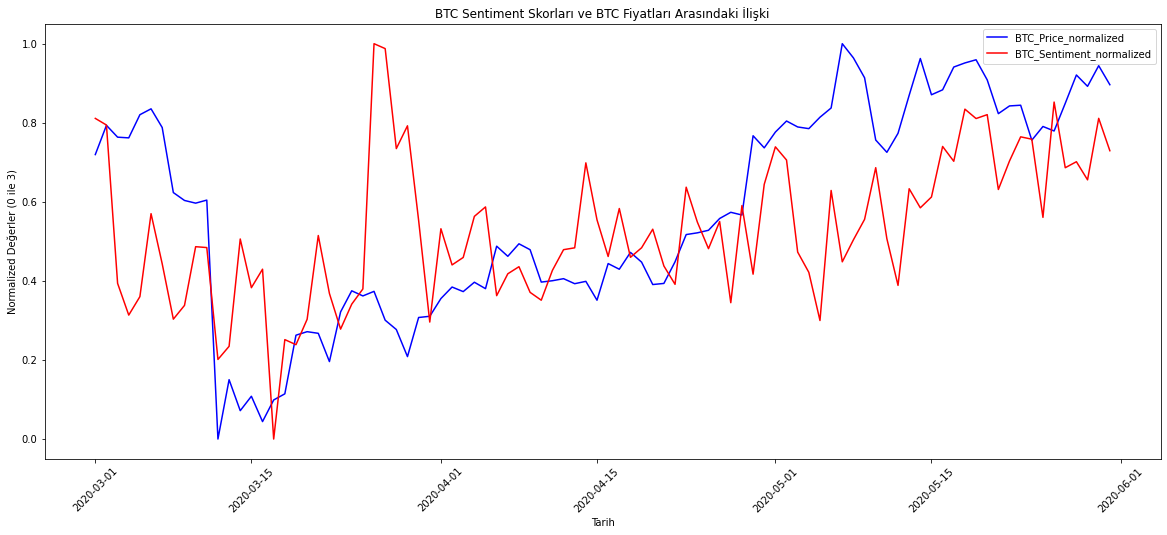

In [86]:
merged_df = pd.merge(btc_sentiment[['Tarih', 'score']], btc[['Tarih', 'btc_Price']], on='Tarih')



# Min-Max Normalizasyonu (0 ile 3 arasında)
new_min = 0
new_max = 1
merged_df['btc_Price_normalized'] = ((merged_df['btc_Price'] - merged_df['btc_Price'].min()) / (merged_df['btc_Price'].max() - merged_df['btc_Price'].min())) * (new_max - new_min) + new_min
merged_df['score_normalized'] = ((merged_df['score'] - merged_df['score'].min()) / (merged_df['score'].max() - merged_df['score'].min())) * (new_max - new_min) + new_min
# Line plot for normalized values of 'sp' and 'vix' datasets
plt.figure(figsize=(20, 8))  # Set the figure size to (width=10, height=6)
plt.plot(merged_df['Tarih'], merged_df['btc_Price_normalized'], label='BTC_Price_normalized', color='blue')
plt.plot(merged_df['Tarih'], merged_df['score_normalized'], label='BTC_Sentiment_normalized', color='red')
plt.xlabel('Tarih')
plt.ylabel('Normalized Değerler (0 ile 3)')
plt.title('BTC Sentiment Skorları ve BTC Fiyatları Arasındaki İlişki')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [87]:
btc=df

In [88]:
# Pearson korelasyon katsayısını hesaplama
correlationn = merged_df['btc_Price_normalized'].corr(merged_df['score_normalized'])
correlationn 

0.4553006145243798

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Assume 'merged_df' DataFrame is already defined, containing 'Şimdi' and 'value' variables

max_lag = 4 # Set the maximum lag for the test

# btc_Price_normalized -> score_normalized
print("Testing Granger Causality for btc_Price_normalized -> score_normalized")
test_result_1 = grangercausalitytests(merged_df[['btc_Price_normalized', 'score_normalized']], max_lag, verbose=True)
print('-'*50)

# score_normalized -> btc_Price_normalized
print("Testing Granger Causality for score_normalized -> btc_Price_normalized")
test_result_2 = grangercausalitytests(merged_df[['score_normalized', 'btc_Price_normalized']], max_lag, verbose=True)

# If needed, you can use 'test_result_1' and 'test_result_2' for further analyses or to store the results.


Testing Granger Causality for btc_Price_normalized -> score_normalized

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0026  , p=0.9594  , df_denom=88, df_num=1
ssr based chi2 test:   chi2=0.0027  , p=0.9586  , df=1
likelihood ratio test: chi2=0.0027  , p=0.9586  , df=1
parameter F test:         F=0.0026  , p=0.9594  , df_denom=88, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2966  , p=0.7441  , df_denom=85, df_num=2
ssr based chi2 test:   chi2=0.6281  , p=0.7305  , df=2
likelihood ratio test: chi2=0.6259  , p=0.7313  , df=2
parameter F test:         F=0.2966  , p=0.7441  , df_denom=85, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5330  , p=0.0626  , df_denom=82, df_num=3
ssr based chi2 test:   chi2=8.2479  , p=0.0412  , df=3
likelihood ratio test: chi2=7.8878  , p=0.0484  , df=3
parameter F test:         F=2.5330  , p=0.0626  , df_denom=82, df_num=3

Granger Causality
number of 

Sonuç olarak lag = 4 gecikme ile atılan tweetlerin duygu durumlarının BTC fiyatlarının üzerinde bir granger nedenselliğine sebep olduğu  p = 0.0380< 0.05 eşik değeri( % 95 güvenle) ile anlamlı çıkmıştır.
BTC fiyatlarının ,BTC sentiment skorunun üzerinde bir granger nedenselliğe sebep olduğu p = 0.0653<0.10 eşik değeri(% 90 güvenle) anlamlı çıkmıştır.
Analizler doğrultusunda çift yönlü nedensellik bulgularına rastlanmıştır.Fakat veri setinin küçük olması sonuçları doğruluğu ve güvenilirliğini düşündürmektedir. Veri setinin daha büyük alınabilmesi halinde sonuçlar daha güvenilir ve doğru olacaktır.
